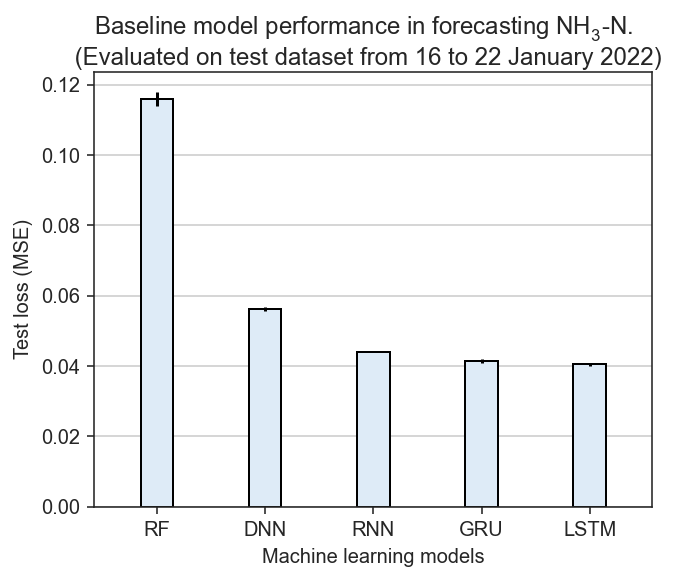

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%config InlineBackend.figure_format='retina'
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
sns.set_style("ticks")
# construct some data like what you have:
# lstm-sg7
fig, ax= plt.subplots(figsize=(5,4))
plt.suptitle('Baseline model performance in forecasting NH$_{3}$-N. \n (Evaluated on test dataset from 16 to 22 January 2022)')
means = np.array([0.1158,0.0561,0.0440,0.0414,0.0405])
std = np.array  ([0.0020,0.0006,0.0001,0.0005,0.0004])
mins = np.array ([0.1127,0.0552,0.0438,0.0408,0.0400])
maxes = np.array([0.1170,0.0566,0.0440,0.0420,0.0410])
# ax.plot(means,c='black',linestyle='--',lw=1)
x=['RF','DNN','RNN','GRU','LSTM']
# create stacked errorbars:
ax.bar(x, means, 0.3, yerr = std,color='#DEEBF7',edgecolor='black')
# ax.errorbar(np.arange(4), means, [means - mins, maxes - means],
#             fmt='.k', ecolor='gray', lw=1)
#ax.set_ylim(0.015,0.035)
# ax.set_xlim(-0.3,3.6)
ax.set_xticks(np.arange(0,5,1))
ax.set_ylabel('Test loss (MSE)')
ax.set_xticklabels(x)
ax.grid(axis='y')
ax.margins(x=0.1)
ax.set_xlabel('Machine learning models')
plt.savefig(r'D:\MPhil-thesis-github-library\MPhil-thesis\Thesis-latex\imgs\results\baseline-models-nh3.png',dpi=300,bbox_inches='tight') 

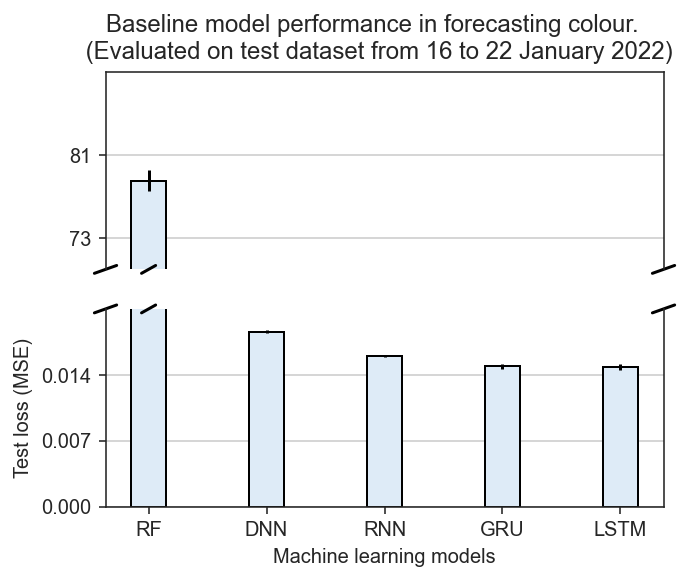

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%config InlineBackend.figure_format='retina'
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
sns.set_style("ticks")
# construct some data like what you have:
# lstm-sg7
fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(5,4))

ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis='x',which='both',bottom=False)
ax2.spines['top'].set_visible(False)

bs = 0.021
ts = 70

ax2.set_ylim(0,bs)
ax2.set_yticks(np.arange(0,bs,0.007))
ax1.set_ylim(ts,89)
ax1.set_yticks(np.arange(73,89,8))


plt.suptitle('Baseline model performance in forecasting colour. \n (Evaluated on test dataset from 16 to 22 January 2022)')
means = np.array([78.5296,0.0186,0.0160,0.0149,0.0148])
std = np.array  ([0.9804,0.0002,0.0001,0.0003,0.0003])
mins = np.array ([76.3678,0.0185,0.0159,0.0146,0.0143])
maxes = np.array([79.1372,0.0188,0.0161,0.0153,0.0150])
x=['RF','DNN','RNN','GRU','LSTM']


bars1 = ax1.bar(x, means, 0.3, yerr = std,color='#DEEBF7',edgecolor='black')
bars2 = ax2.bar(x, means, 0.3, yerr = std,color='#DEEBF7',edgecolor='black')

for tick in ax2.get_xticklabels():
    tick.set_rotation(0)
d = .02  
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)      
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

for b1, b2 in zip(bars1, bars2):
    posx = b2.get_x() + b2.get_width()/2.
    if b2.get_height() > bs:
        ax2.plot((posx-3*d, posx+3*d), (1 - d, 1 + d), color='k', clip_on=False,
                 transform=ax2.get_xaxis_transform())
    if b1.get_height() > ts:
        ax1.plot((posx-3*d, posx+3*d), (- d, + d), color='k', clip_on=False,
                 transform=ax1.get_xaxis_transform())
####

# ax.plot(means,c='black',linestyle='--',lw=1)

# create stacked errorbars:
#ax.bar(x, means, 0.3, yerr = std,color='#DEEBF7',edgecolor='black')
## ax.errorbar(np.arange(4), means, [means - mins, maxes - means],
##             fmt='.k', ecolor='gray', lw=1)
##ax.set_ylim(0.015,0.035)
## ax.set_xlim(-0.3,3.6)
#ax.set_xticks(np.arange(0,5,1))
ax2.set_ylabel('Test loss (MSE)')
ax1.grid(axis='y')
ax2.grid(axis='y')
ax2.margins(x=0.1)
ax2.set_xlabel('Machine learning models')
plt.savefig(r'D:\MPhil-thesis-github-library\MPhil-thesis\Thesis-latex\imgs\results\baseline-models-colour.png',dpi=300,bbox_inches='tight') 
plt.show()

LSTM + data preprocessing

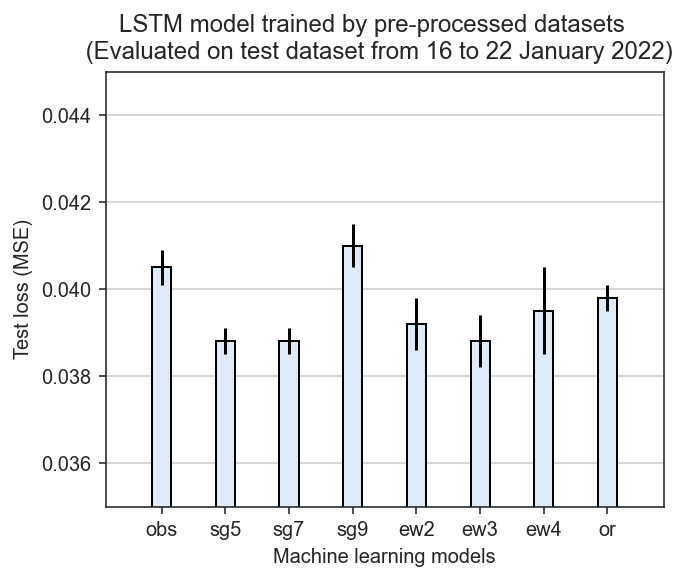

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%config InlineBackend.figure_format='retina'
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
sns.set_style("ticks")
# construct some data like what you have:
# lstm-sg7
fig, ax= plt.subplots(figsize=(5,4))
plt.suptitle('LSTM model trained by pre-processed datasets \n (Evaluated on test dataset from 16 to 22 January 2022)')
means = np.array([0.0405,0.0388,0.0388,0.0410,0.0392,0.0388,0.0395,0.0398])
std = np.array  ([0.0004,0.0003,0.0003,0.0005,0.0006,0.0006,0.0010,0.0003])
mins = np.array ([0.0400,0.0385,0.0383,0.0404,0.0387,0.0380,0.0384,0.0394])
maxes = np.array([0.0410,0.0392,0.0391,0.0415,0.0400,0.0392,0.0408,0.0400])
x=['obs','sg5','sg7','sg9','ew2','ew3','ew4','or']

# ax.plot(means,c='black',linestyle='--',lw=1)
# create stacked errorbars:
ax.bar(x, means, 0.3, yerr = std,color='#DEEBF7',edgecolor='black')
# ax.errorbar(np.arange(4), means, [means - mins, maxes - means],
#             fmt='.k', ecolor='gray', lw=1)
ax.set_ylim(0.035,0.045)
# ax.set_xlim(-0.3,3.6)
ax.set_xticks(np.arange(0,8,1))
ax.set_ylabel('Test loss (MSE)')
ax.set_xticklabels(x)
ax.grid(axis='y')
ax.margins(x=0.1)
ax.set_xlabel('Machine learning models')
plt.savefig(r'D:\MPhil-thesis-github-library\MPhil-thesis\Thesis-latex\imgs\results\pre-processing-nh3-jan.png',dpi=300,bbox_inches='tight') 
plt.show()

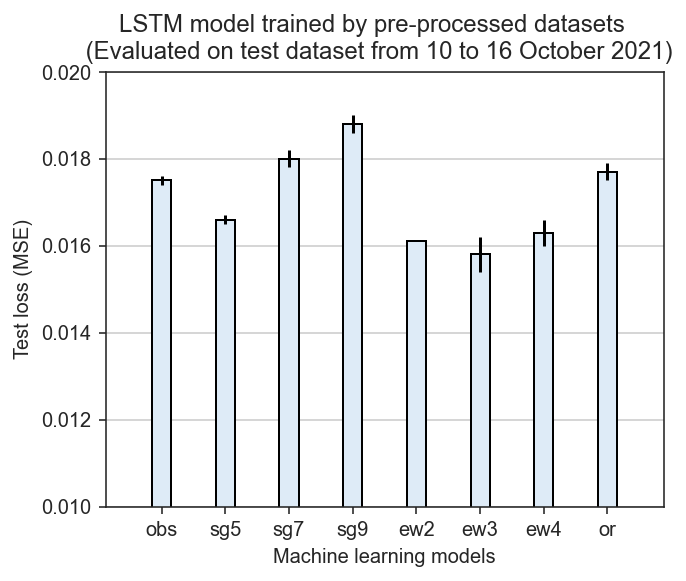

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%config InlineBackend.figure_format='retina'
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
sns.set_style("ticks")
# construct some data like what you have:
# lstm-sg7
fig, ax= plt.subplots(figsize=(5,4))
plt.suptitle('LSTM model trained by pre-processed datasets \n (Evaluated on test dataset from 10 to 16 October 2021)')
means = np.array([0.0175,0.0166,0.0180,0.0188,0.0161,0.0158,0.0163,0.0177])
std = np.array  ([0.0001,0.0001,0.0002,0.0002,0.0000,0.0004,0.0003,0.0002])
mins = np.array ([0.0173,0.0165,0.0177,0.0186,0.0161,0.0155,0.0160,0.0175])
maxes = np.array([0.0176,0.0157,0.0182,0.0191,0.0161,0.0164,0.0168,0.0180])
x=['obs','sg5','sg7','sg9','ew2','ew3','ew4','or']

# ax.plot(means,c='black',linestyle='--',lw=1)
# create stacked errorbars:
ax.bar(x, means, 0.3, yerr = std,color='#DEEBF7',edgecolor='black')
# ax.errorbar(np.arange(4), means, [means - mins, maxes - means],
#             fmt='.k', ecolor='gray', lw=1)
ax.set_ylim(0.01,0.02)
# ax.set_xlim(-0.3,3.6)
ax.set_xticks(np.arange(0,8,1))
ax.set_ylabel('Test loss (MSE)')
ax.set_xticklabels(x)
ax.grid(axis='y')
ax.margins(x=0.1)
ax.set_xlabel('Machine learning models')
plt.savefig(r'D:\MPhil-thesis-github-library\MPhil-thesis\Thesis-latex\imgs\results\pre-processing-nh3-oct.png',dpi=300,bbox_inches='tight') 
plt.show()

colour preprocessing"

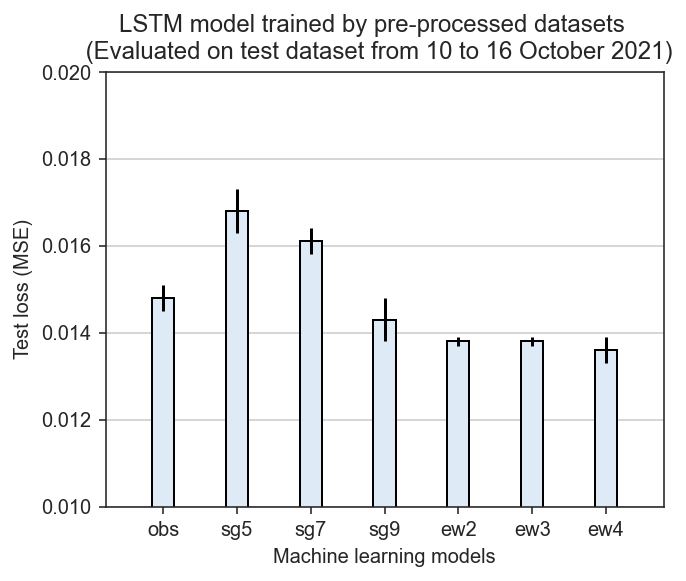

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%config InlineBackend.figure_format='retina'
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
sns.set_style("ticks")
# construct some data like what you have:
# lstm-sg7
fig, ax= plt.subplots(figsize=(5,4))
plt.suptitle('LSTM model trained by pre-processed datasets \n (Evaluated on test dataset from 10 to 16 October 2021)')
means = np.array([0.0148,0.0168,0.0161,0.0143,0.0138,0.0138,0.0136])
std = np.array  ([0.0003,0.0005,0.0003,0.0005,0.0001,0.0001,0.0003])
mins = np.array ([0.0143,0.0162,0.0158,0.0138,0.0139,0.0140,0.0139])
maxes = np.array([0.0150,0.0174,0.0164,0.0149,0.0139,0.0140,0.0139])
x=['obs','sg5','sg7','sg9','ew2','ew3','ew4']

# ax.plot(means,c='black',linestyle='--',lw=1)
# create stacked errorbars:
ax.bar(x, means, 0.3, yerr = std,color='#DEEBF7',edgecolor='black')
# ax.errorbar(np.arange(4), means, [means - mins, maxes - means],
#             fmt='.k', ecolor='gray', lw=1)
ax.set_ylim(0.01,0.02)
# ax.set_xlim(-0.3,3.6)
ax.set_xticks(np.arange(0,7,1))
ax.set_ylabel('Test loss (MSE)')
ax.set_xticklabels(x)
ax.grid(axis='y')
ax.margins(x=0.1)
ax.set_xlabel('Machine learning models')
plt.savefig(r'D:\MPhil-thesis-github-library\MPhil-thesis\Thesis-latex\imgs\results\pre-processing-colour.png',dpi=300,bbox_inches='tight') 
plt.show()

C:\Users\Tim\AppData\Local\Temp/ipykernel_35512/4200241144.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(name)


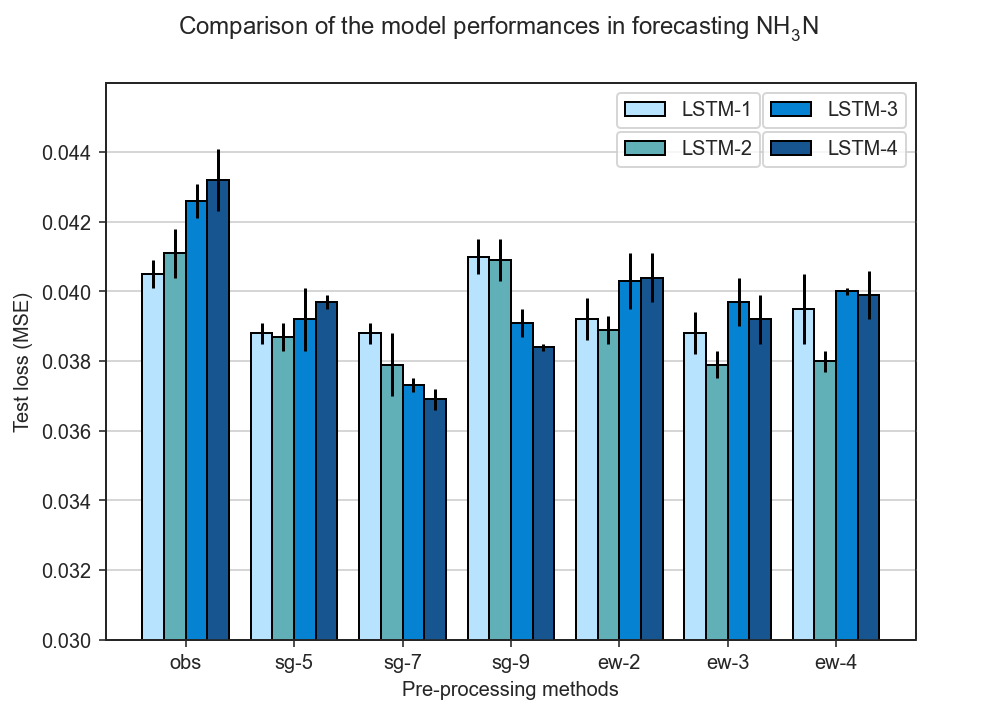

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%config InlineBackend.figure_format='retina'
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
sns.set_style("ticks")
# construct some data like what you have:
# lstm-sg7
fig, ax= plt.subplots(figsize=(7,5))
plt.suptitle('Comparison of the model performances in forecasting NH$_{3}$N')
x = np.arange(7)
lstm_1 =     np.array([0.0405,0.0388,0.0388,0.0410,0.0392,0.0388,0.0395])
lstm_1_std = np.array([0.0004,0.0003,0.0003,0.0005,0.0006,0.0006,0.0010])
lstm_3 =     np.array([0.0426,0.0392,0.0373,0.0391,0.0403,0.0397,0.0400])
lstm_3_std = np.array([0.0005,0.0009,0.0002,0.0004,0.0008,0.0007,0.0001])

lstm_2 =     np.array([0.0411,0.0387,0.0379,0.0409,0.0389,0.0379,0.0380])
lstm_2_std = np.array([0.0007,0.0004,0.0009,0.0006,0.0004,0.0004,0.0003])
lstm_4 =     np.array([0.0432,0.0397,0.0369,0.0384,0.0404,0.0392,0.0399])
lstm_4_std = np.array([0.0009,0.0002,0.0003,0.0001,0.0007,0.0007,0.0007])

color4 = '#16558F'
color3 = '#0583D2'
color2 = '#61B0B7'
color1 = '#B8E3FF'

name=['','obs','sg-5','sg-7','sg-9','ew-2','ew-3','ew-4']
ax.bar(x - 0.3,lstm_1, 0.2, yerr = lstm_1_std,color=color1,edgecolor='black',label='LSTM-1')
ax2, ax3, ax4 = ax.twinx(),ax.twinx(),ax.twinx()

ax2.bar(x - 0.1,lstm_2, 0.2, yerr = lstm_2_std,color=color2,edgecolor='black',label='LSTM-2')
ax3.bar(x + 0.1,lstm_3, 0.2, yerr = lstm_3_std,color=color3,edgecolor='black',label='LSTM-3')
ax4.bar(x + 0.3,lstm_4, 0.2, yerr = lstm_4_std,color=color4,edgecolor='black',label='LSTM-4')

ax.legend(loc='upper right', bbox_to_anchor=(0.82, 1))
ax2.legend(loc='upper right', bbox_to_anchor=(0.82, 0.93))
ax3.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax4.legend(loc='upper right', bbox_to_anchor=(1, 0.93))

y_low = 0.03
y_up = 0.046
ax.set_yticks(np.arange(y_low, y_up, .002))
ax.set_ylim( y_low,y_up)
ax2.set_ylim(y_low,y_up)
ax3.set_ylim(y_low,y_up)
ax4.set_ylim(y_low,y_up)
ax2.tick_params(axis='y', colors='white')
ax3.tick_params(axis='y', colors='white')
ax4.tick_params(axis='y', colors='white')

# ax.set_xticks(np.arange(0,8,1))
# ax.set_ylabel('Test loss (MSE)')
ax.grid(axis='y')
ax.set_xticklabels(name)
ax.set_ylabel('Test loss (MSE)')
# ax.margins(x=0.1)
ax.set_xlabel('Pre-processing methods')

plt.tight_layout()
plt.savefig(r'D:\MPhil-thesis-github-library\MPhil-thesis\Thesis-latex\imgs\results\feature-engineering\nh3-input-1-4-comparison.png',dpi=300,bbox_inches='tight') 
plt.show()

C:\Users\Tim\AppData\Local\Temp/ipykernel_35512/2051576358.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(name)


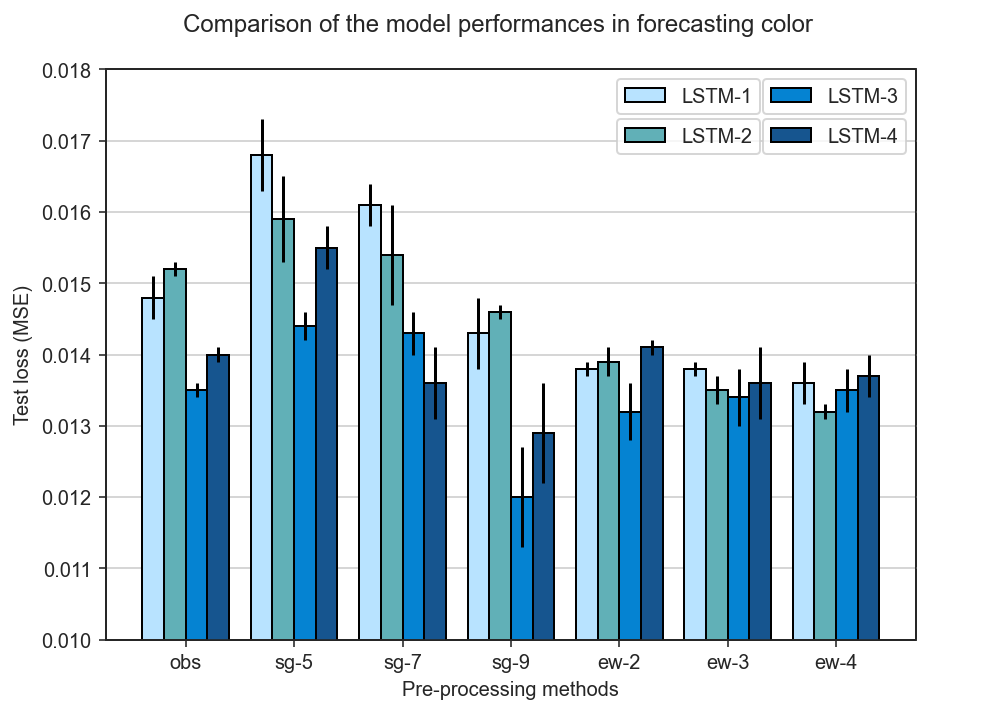

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%config InlineBackend.figure_format='retina'
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
sns.set_style("ticks")
# construct some data like what you have:
# lstm-sg7
fig, ax= plt.subplots(figsize=(7,5))
plt.suptitle('Comparison of the model performances in forecasting color')
x = np.arange(7)
lstm_1 =     np.array([0.0148,0.0168,0.0161,0.0143,0.0138,0.0138,0.0136])
lstm_1_std = np.array([0.0003,0.0005,0.0003,0.0005,0.0001,0.0001,0.0003])
lstm_3 =     np.array([0.0135,0.0144,0.0143,0.0120,0.0132,0.0134,0.0135])
lstm_3_std = np.array([0.0001,0.0002,0.0003,0.0007,0.0004,0.0004,0.0003])

lstm_2 =     np.array([0.0152,0.0159,0.0154,0.0146,0.0139,0.0135,0.0132])
lstm_2_std = np.array([0.0001,0.0006,0.0007,0.0001,0.0002,0.0002,0.0001])
lstm_4 =     np.array([0.0140,0.0155,0.0136,0.0129,0.0141,0.0136,0.0137])
lstm_4_std = np.array([0.0001,0.0003,0.0005,0.0007,0.0001,0.0005,0.0003])

color4 = '#16558F'
color3 = '#0583D2'
color2 = '#61B0B7'
color1 = '#B8E3FF'

name=['','obs','sg-5','sg-7','sg-9','ew-2','ew-3','ew-4']
ax.bar(x - 0.3,lstm_1, 0.2, yerr = lstm_1_std,color=color1,edgecolor='black',label='LSTM-1')
ax2, ax3, ax4 = ax.twinx(),ax.twinx(),ax.twinx()

ax2.bar(x - 0.1,lstm_2, 0.2, yerr = lstm_2_std,color=color2,edgecolor='black',label='LSTM-2')
ax3.bar(x + 0.1,lstm_3, 0.2, yerr = lstm_3_std,color=color3,edgecolor='black',label='LSTM-3')
ax4.bar(x + 0.3,lstm_4, 0.2, yerr = lstm_4_std,color=color4,edgecolor='black',label='LSTM-4')

ax.legend(loc='upper right', bbox_to_anchor=(0.82, 1))
ax2.legend(loc='upper right', bbox_to_anchor=(0.82, 0.93))
ax3.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax4.legend(loc='upper right', bbox_to_anchor=(1, 0.93))

ax.set_ylim( 0.01,0.018)
ax2.set_ylim(0.01,0.018)
ax3.set_ylim(0.01,0.018)
ax4.set_ylim(0.01,0.018)
ax2.tick_params(axis='y', colors='white')
ax3.tick_params(axis='y', colors='white')
ax4.tick_params(axis='y', colors='white')

# ax.set_xticks(np.arange(0,8,1))
# ax.set_ylabel('Test loss (MSE)')
ax.set_xticklabels(name)
# ax.margins(x=0.1)
ax.grid(axis='y')
ax.set_xlabel('Pre-processing methods')
ax.set_ylabel('Test loss (MSE)')
plt.tight_layout()
plt.savefig(r'D:\MPhil-thesis-github-library\MPhil-thesis\Thesis-latex\imgs\results\feature-engineering\colour-input-1-4-comparison.png',dpi=300,bbox_inches='tight') 
plt.show()